<a href="https://colab.research.google.com/github/hubertrykala93/language_detection_predict/blob/main/language_detection_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
np.set_printoptions(suppress=True, edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: f'{x:.8f}'))
np.random.seed(42)

In [ ]:
sns.set()

In [ ]:
desired_width = 320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 12)

In [ ]:
raw_data = pd.read_csv(filepath_or_buffer='/content/language_detection.csv')

In [ ]:
all_data = raw_data.copy()

In [ ]:
all_data.head(n=10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [ ]:
all_data.describe(include='object').transpose()

,count,unique,top,freq
Text,22000,21859,haec commentatio automatice praeparata res ast...,48
language,22000,22,Estonian,1000


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [ ]:
all_data[all_data.duplicated()]

,Text,language
410,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
581,haec commentatio automatice praeparata res ast...,Latin
1012,haec commentatio automatice praeparata res ast...,Latin
1027,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
1460,haec commentatio automatice praeparata res ast...,Latin
...,...,...
21427,seperti asteroid secara keseluruhan asteroid i...,Indonesian
21440,كباقي كويكبات معسكر الإغريق يقع مداره في النقط...,Arabic
21667,خواص - نسبتا اسيدي خواص لري په اوبو کى منحل دي...,Pushto
21739,இவ்வூர் கடல்மட்டத்தில் இருந்து சராசரியாக மீட்...,Tamil


In [ ]:
all_data.drop_duplicates(inplace=True)

In [ ]:
all_data.columns = [column.lower() for column in all_data.columns]

In [ ]:
all_data['language'] = all_data['language'].astype(dtype='category')

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21859 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   text      21859 non-null  object  
 1   language  21859 non-null  category
dtypes: category(1), object(1)
memory usage: 363.6+ KB


In [ ]:
all_data['language'].value_counts()

Persian       1000
Japanese      1000
Turkish       1000
Thai          1000
Romanian      1000
Chinese       1000
Korean        1000
Urdu          1000
English       1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

Text(0.5, 1.0, 'Language distribution')

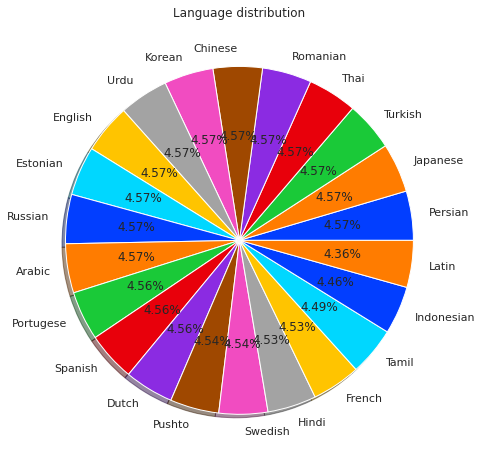

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(x=all_data['language'].value_counts(), labels=all_data['language'].value_counts().index, autopct='%.2f%%',
        shadow=True, colors=sns.color_palette('bright'))
plt.title(label='Language distribution')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_data['text'], all_data['language'], test_size=0.2, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (17487,)
X_test shape: (4372,)
y_train shape: (17487,)
y_test shape: (4372,)


In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)

In [ ]:
X_train = vectorizer.fit_transform(raw_documents=X_train).toarray()
X_test = vectorizer.transform(raw_documents=X_test).toarray()

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Vectorizer vocabulary: {vectorizer.vocabulary_}')

X_train shape: (17487, 3000)
X_test shape: (4372, 3000)
Vectorizer vocabulary: {'când': 255, 'se': 1036, 'sau': 1033, 'la': 639, 'cu': 248, 'este': 386, 'mai': 684, 'ca': 183, 'să': 1163, 'în': 1389, 'fața': 405, 'pentru': 902, 'că': 256, 'această': 11, 'pe': 897, 'de': 274, 'ce': 195, 'al': 31, 'și': 1402, 'prin': 949, 'от': 1442, 'из': 1421, 'также': 1456, 'года': 1411, 'os': 866, 'seus': 1080, 'são': 1157, 'ou': 870, 'தன': 2675, 'தம': 2678, 'அர': 2579, 'என': 2627, 'ஊர': 2623, 'ஒர': 2632, 'பத': 2696, 'றந': 2736, 'தந': 2674, 'இந': 2606, 'ஆய': 2594, 'ளர': 2753, 'பண': 2695, 'வக': 2756, 'வர': 2765, 'மட': 2711, 'பட': 2694, 'இல': 2612, 'இவர': 2615, 'இரண': 2611, 'கள': 2647, 'சத': 2653, 'பக': 2692, 'அவர': 2587, 'யர': 2725, 'ரத': 2731, 'சப': 2656, 'ஆர': 2595, 'யம': 2724, 'பவர': 2708, 'அதன': 2574, 'றக': 2734, 'கழ': 2649, 'லப': 2745, 'டன': 2663, 'கவ': 2650, 'கல': 2645, 'கத': 2639, 'தய': 2679, 'கப': 2641, 'தல': 2682, 'இச': 2599, 'கர': 2643, 'année': 60, 'le': 650, 'du': 328, 'premier': 937, 'au'

In [ ]:
classifier = SVC(kernel='rbf')

In [ ]:
classifier.fit(X=X_train, y=y_train)
y_pred = classifier.predict(X=X_test)

In [ ]:
print(f'Classifier score: {classifier.score(X=X_test, y=y_test)}')

Classifier score: 0.9428179322964318


In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

      Arabic       0.99      0.99      0.99       193
     Chinese       0.54      0.93      0.68       192
       Dutch       1.00      0.98      0.99       191
     English       0.82      0.99      0.89       202
    Estonian       0.96      0.95      0.96       194
      French       0.96      1.00      0.98       178
       Hindi       1.00      0.98      0.99       164
  Indonesian       1.00      0.96      0.98       220
    Japanese       0.87      0.30      0.44       176
      Korean       1.00      0.96      0.98       215
       Latin       0.93      0.95      0.94       217
     Persian       1.00      0.98      0.99       193
   Portugese       1.00      0.99      0.99       190
      Pushto       1.00      0.95      0.98       186
    Romanian       1.00      0.98      0.99       222
     Russian       0.99      0.94      0.97       192
     Spanish       0.98      0.95      0.96       211
     Swedish       1.00    

In [58]:
predictions = pd.DataFrame(data={
    'y_true': y_test,
    'y_pred': y_pred
})

In [59]:
predictions

,y_true,y_pred
3186,Indonesian,Indonesian
18095,English,English
12148,Swedish,Swedish
1986,Romanian,Romanian
12901,Hindi,Hindi
...,...,...
15635,Korean,Korean
7535,Korean,Korean
21679,Thai,Thai
1278,Latin,Latin


In [61]:
predictions.to_csv(path_or_buf='/content/predictions.csv')